In [32]:
from pathlib import Path
import json
import os

TEAM_NAME = os.getenv("TEAM_NAME")
TEAM_TRACK = os.getenv("TEAM_TRACK")

In [33]:
data_dir = Path.home() / TEAM_TRACK / "surprise"
instance_dirs = list(data_dir.iterdir())[:45]
results_dir = Path.home() / TEAM_NAME
results_path = results_dir / "surprise_results.json"

ground_truths = []
for instance_dir in instance_dirs:
    with open(instance_dir / "gt.txt", "r") as gt_file:
        ground_truths.append(list(map(int, gt_file.read().split(" "))))

In [34]:
with open(results_path, "r") as f:
    result = json.load(f)

In [35]:
import glob
import numpy as np
from PIL import Image
import cv2

In [36]:
wrong_ids = []
i = 0
for pred, gt in zip(result, ground_truths):
    if pred != gt:
        wrong_ids.append(i)
    i += 1
wrong_ids

[24]

In [28]:
result[24]

[3, 13, 8, 11, 2, 9, 1, 10, 0, 5, 7, 12, 14, 4, 6]

In [37]:
instance_dirs[24]

PosixPath('/home/jupyter/advanced/surprise/30')

In [24]:
sample_id = 24
img_paths = glob.glob(f"/home/jupyter/advanced/surprise/{str(sample_id)}/slices/*")
print(len(img_paths))

15


In [25]:
pil_imgs = [Image.open(p).convert('L') for p in img_paths]
np_imgs = [np.asarray(img) for img in pil_imgs]
def threshold_np(arr, threshold=128):
    arrcopy = arr.copy()
    arrcopy[arr >= threshold] = 255
    arrcopy[arr < threshold] = 0
    return arrcopy
np_imgs_thr = np.array([arr for arr in np_imgs])

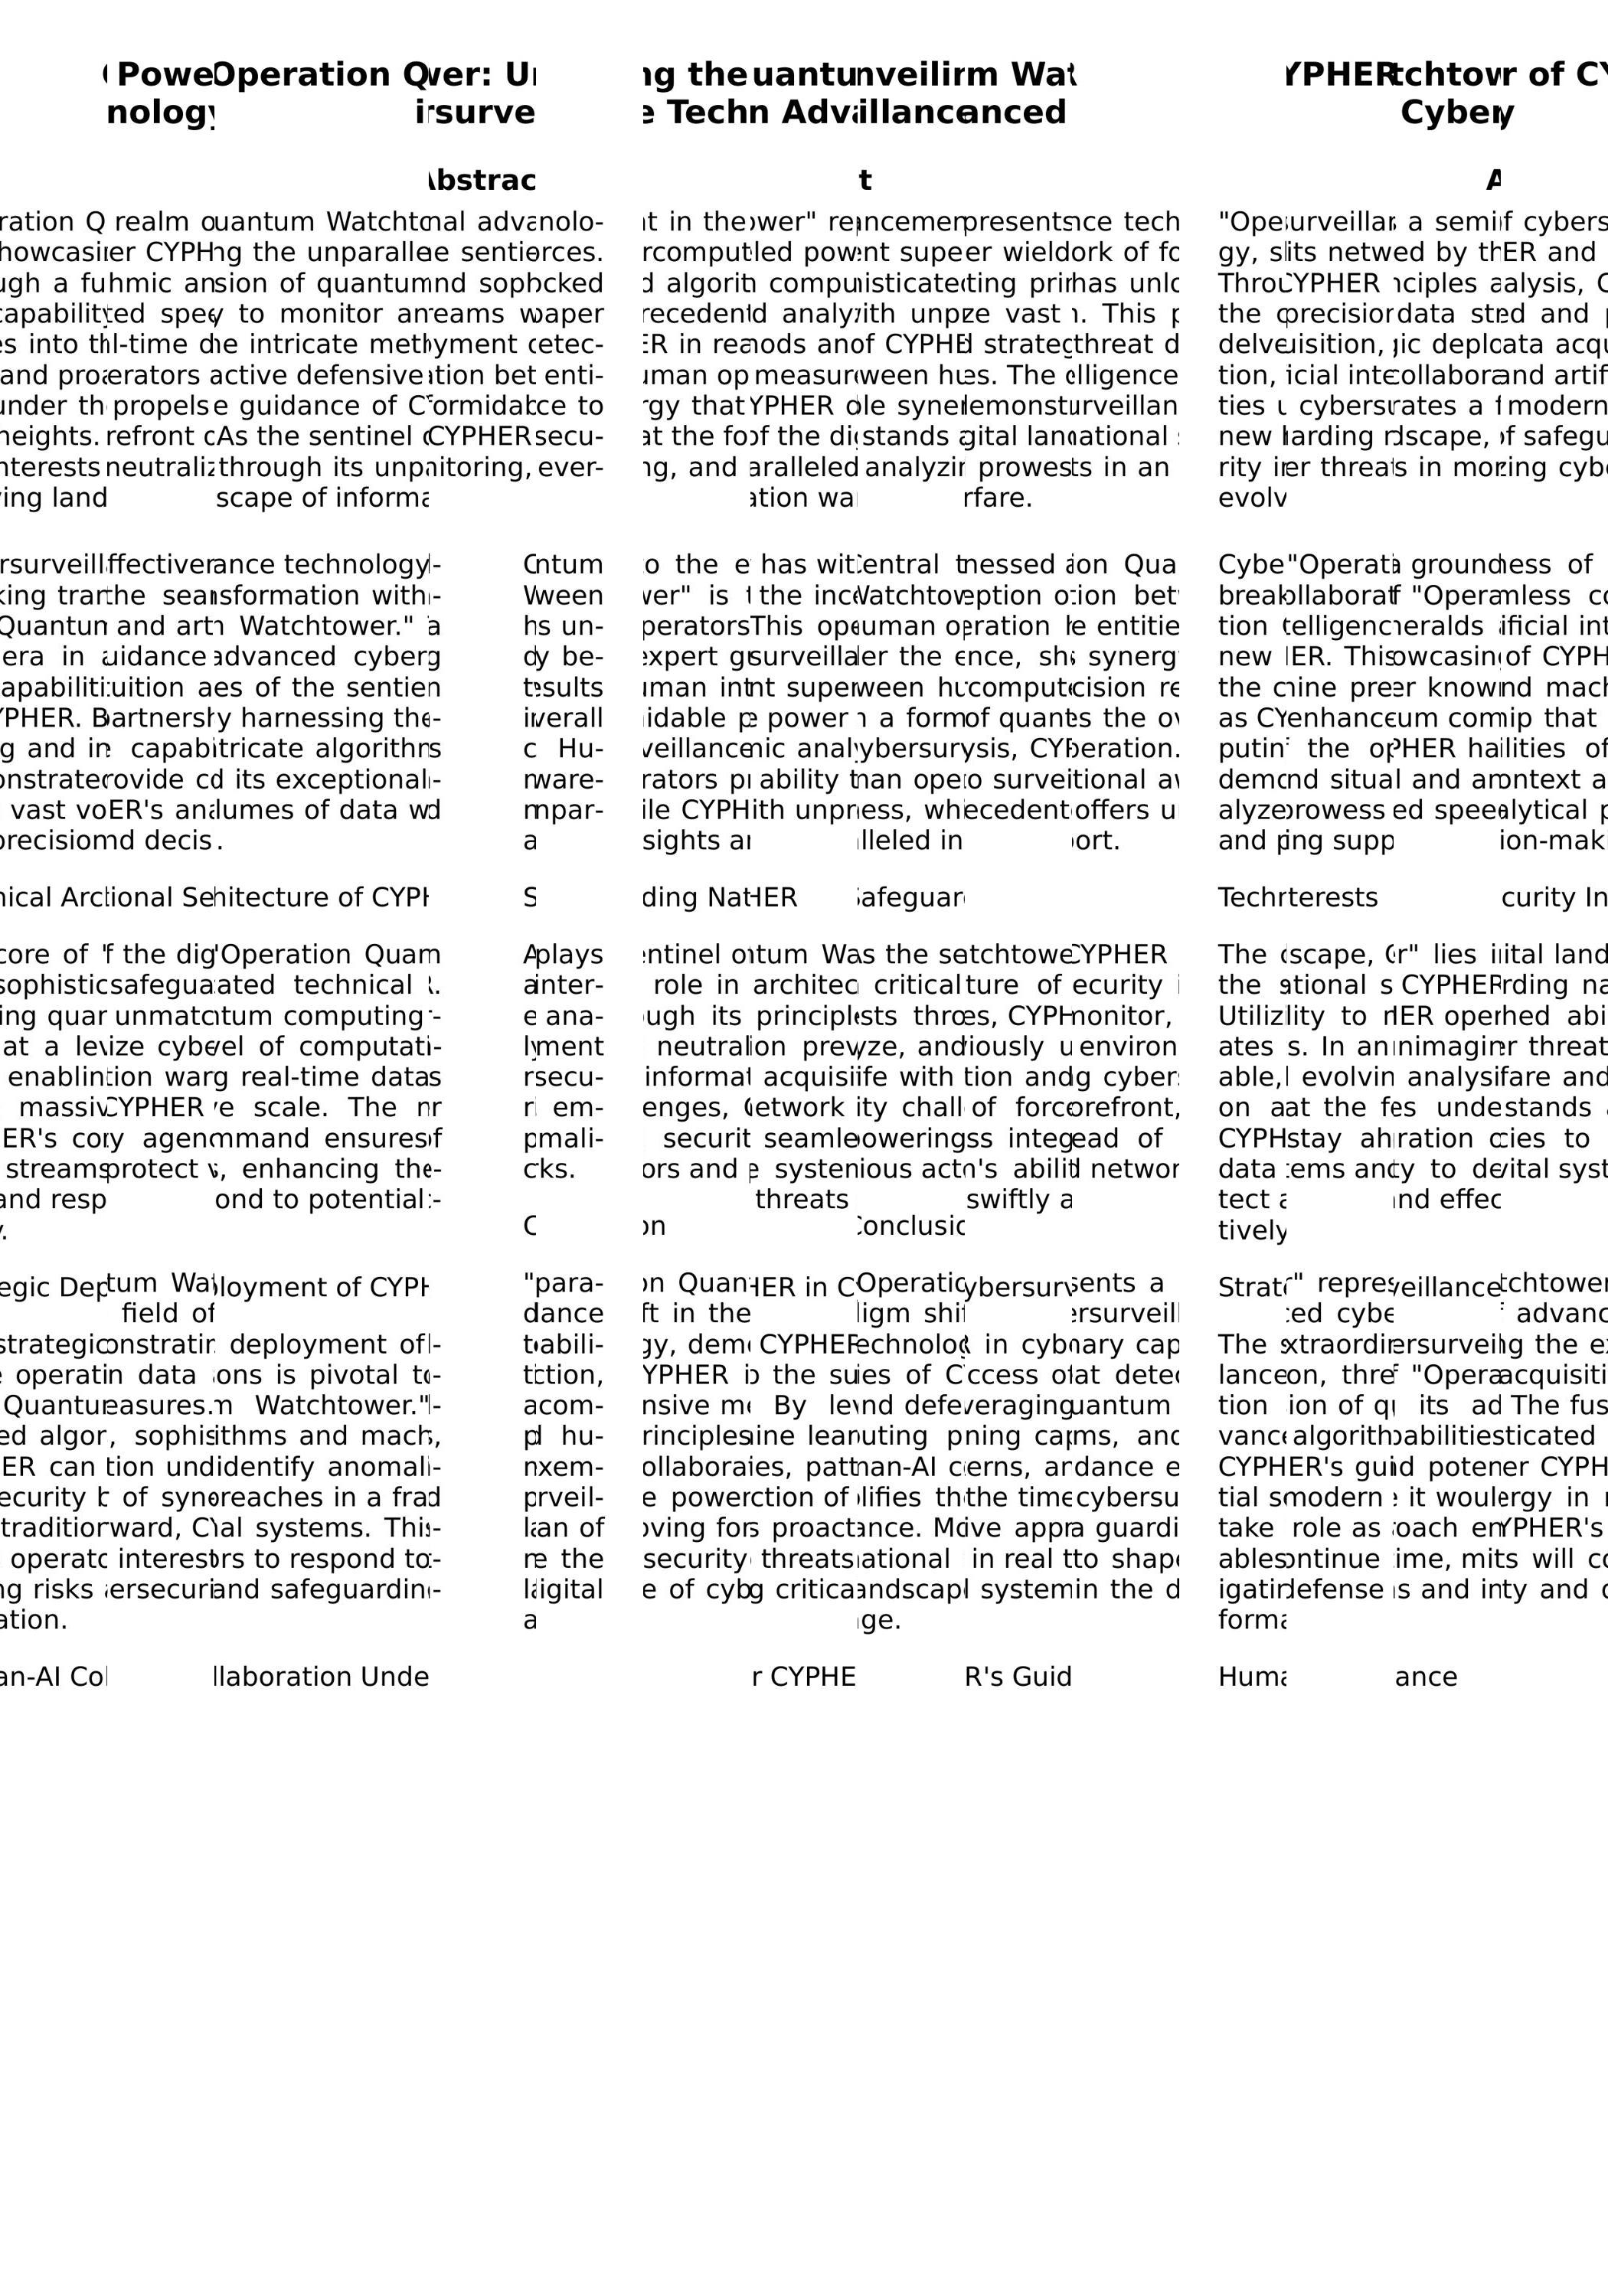

In [26]:
Image.fromarray(np.concat(np_imgs_thr, axis=1))